## Mini Project 2  -  Students Performance

## Imports

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set()    # use seaborn styles

import warnings
warnings.filterwarnings("ignore")

## Import the dataset

##### For convinience, I have uploaded the dataset to github since I am using google colab for this project, I don't want to be uploading the file each time I run this notebook

In [2]:
dataset_url = 'https://raw.githubusercontent.com/abdulaihalidu/Abo-Academy-Data-Science/main/Students%20performance%20evaluation/MP2_Data.csv'
students_performance_dataset = pd.read_csv(dataset_url)


In [3]:
# Let's check if the dataset was read successfully
students_performance_dataset.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [4]:
# # check the dimension of the dataset
students_performance_dataset.shape

(107, 48)

In [5]:
# there are 48 columns, we need to set pandas's display options so that we can see all the 48 columns
pd.options.display.max_columns = None
# now, let's check the last five rows
students_performance_dataset.tail()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
102,ML-2020-60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,0,0,2,12,1,0,13,4,0,0,14,16,1,4,9,4,0,0,7,11,2,0,13,7,0,0,28,0,22,0,1,0,0,0,0
103,ML-2020-58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,0,22,13,1,0,10,0,0,0,5,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
104,ML-2020-94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,9,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,ML-2020-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0,0,9,0,0,5,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
106,ML-2020-86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Let's have a quick look at the statistical overview of the dataset
students_performance_dataset.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,6.785047,0.0,0.598131,0.224299,16.88785,13.299065,1.252336,1.841121,31.728972,2.822430,0.953271,1.130841,41.915888,16.046729,1.943925,1.009346,26.074766,5.009346,1.588785,0.663551,37.607477,14.271028,2.775701,0.411215,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,7.157300,0.0,1.966031,0.730836,16.30796,11.308049,1.505295,4.202761,28.686191,3.206165,2.689544,2.269919,47.164330,17.040675,2.790928,2.806648,31.159269,6.568213,3.954823,1.822003,47.851334,14.009815,7.206271,1.220526,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,4.000000,0.0,0.000000,0.000000,15.00000,11.000000,1.000000,0.000000,27.000000,4.000000,0.000000,0.000000,27.000000,15.000000,1.000000,0.000000,20.000000,4.000000,0.000000,0.000000,18.000000,15.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,12.000000,0.0,0.000000,0.000000,24.00000,19.000000,1.000000,2.000000,47.500000,4.000000,0.000000,1.000000,74.500000,27.500000,2.000000,1.000000,40.500000,6.500000,1.000000,0.000000,65.000000,25.000000,2.000000,0.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,27.000000,0.0,11.000000,6.000000,104.00000,57.000000,10.000000,25.000000,108.000000,15.000000,15.000000,14.000000,240.000000,87.000000,13.000000,24.000000,185.000000,39.000000,23.000000,11.000000,208.000000,51.000000,45.000000,7.000000,145.000000,24.000000,

##### Observe that Week8_Total is describing the final grade in a certain way? The imperation is that, by looking at this feature alone, our model will be able to predict the student's grade with good precision. This is becuase Week8_Total is a summary of all the features before it. We are better off dropping this feature as including this feature will introduce bias in our model.

In [7]:
# Let's get a quick information on the dataset
students_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

#### It can be seen that there are no null values. However, we need to check whether each column has distinct values. A column which has the same values in the same column won't probably contribute much to our predective model


In [8]:
students_performance_dataset.apply(lambda x: x.nunique())   # Returns the number of unique values in each feature(column)

ID             107
Week2_Quiz1      7
Week3_MP1        9
Week3_PR1        2
Week5_MP2       25
Week5_PR2        5
Week7_MP3       35
Week7_PR3        3
Week4_Quiz2     23
Week6_Quiz3      7
Week8_Total     70
Week1_Stat0     25
Week1_Stat1      1
Week1_Stat2      6
Week1_Stat3      4
Week2_Stat0     37
Week2_Stat1     25
Week2_Stat2      8
Week2_Stat3     12
Week3_Stat0     59
Week3_Stat1      8
Week3_Stat2      9
Week3_Stat3      9
Week4_Stat0     61
Week4_Stat1     37
Week4_Stat2     11
Week4_Stat3      8
Week5_Stat0     48
Week5_Stat1     20
Week5_Stat2     12
Week5_Stat3      8
Week6_Stat0     49
Week6_Stat1     32
Week6_Stat2     13
Week6_Stat3      7
Week7_Stat0     42
Week7_Stat1     18
Week7_Stat2     11
Week7_Stat3     10
Week8_Stat0     32
Week8_Stat1     16
Week8_Stat2      9
Week8_Stat3      6
Week9_Stat0     26
Week9_Stat1     11
Week9_Stat2     11
Week9_Stat3      2
Grade            5
dtype: int64

In [9]:
# check the unique values in Week3_PR1 features
students_performance_dataset.Week3_PR1.unique()

array([5., 0.])

In [10]:
# check the unique values in Week7_PR3 features
students_performance_dataset.Week7_PR3.unique()

array([5. , 2.5, 0. ])

##### Observe that there is only 1 unique value for the Week1_Stat1 feature? This means that all the data entries have the same value for this feature. As such, it is insignificant to include this feature in the modelling process. Also, the ID feature is not important. I prefer the default index from pandas so I will drop this feature as well. For now, let's get to preprocessing!

## Step 1 - Data Preprocessing

In [12]:
# It's a good practice to create a copy of our dataset so that we won't have to run from start in case an unintended modification is done to the dataset
students_df = students_performance_dataset.copy()

In [13]:
# let's start the process by dropping the features that we have identified to be of no important or will harm the performance of our model
columns_2_drop = ['ID', 'Week1_Stat1']
# drop the columns
students_df.drop(columns_2_drop, axis=1, inplace=True)
students_df.head()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [14]:
# Check the new shape of the dataset
print(f"The dataset has {students_df.shape[0]} entries and {students_df.shape[1]} features")

The dataset has 107 entries and 46 features


#### Everything about the dataset looks good. There are no null values and all values are in a reasonable good range. Let's have a quick visualization to understand the dataset better

## Step 2 - Visualization

In [15]:
# Let's check to see if there are any features that are correlated
students_df_corr = students_df.corr()
students_df_corr

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
Week2_Quiz1,1.000000,0.739992,0.723109,0.677371,0.710990,0.635804,0.622655,0.746331,0.695119,0.739192,0.300366,-0.117627,0.181211,0.280832,0.556281,0.310806,0.110425,0.414033,0.492643,-0.214260,0.118382,0.473524,0.531564,0.083647,0.143124,0.376278,0.214373,0.048646,0.077445,0.484821,0.600026,0.255848,0.234891,0.235727,0.245937,0.070341,0.391529,0.390792,0.429210,0.018500,0.235174,0.472536,0.436145,0.213437,0.045046,0.689783
Week3_MP1,0.739992,1.000000,0.962502,0.905769,0.964849,0.881352,0.834397,0.879998,0.912700,0.965074,0.207722,-0.138389,0.045340,0.263653,0.438057,0.300951,0.187910,0.620521,0.681233,-0.162276,0.269732,0.644619,0.673207,0.131970,0.251183,0.590277,0.497733,0.065954,0.273885,0.637614,0.800424,0.269825,0.301914,0.414058,0.424435,0.108034,0.455459,0.477576,0.541086,0.037039,0.268698,0.549969,0.518334,0.154754,0.099824,0.901788
Week3_PR1,0.723109,0.962502,1.000000,0.890706,0.942896,0.868638,0.830599,0.904170,0.906560,0.952095,0.190054,-0.133647,0.039920,0.242157,0.393277,0.299888,0.195973,0.578590,0.682480,-0.163175,0.159611,0.641850,0.701907,0.151609,0.252379,0.493960,0.410296,0.041491,0.199237,0.631253,0.781563,0.268998,0.299595,0.413137,0.432823,0.105181,0.456261,0.403779,0.500834,0.022088,0.185638,0.561184,0.489662,0.170683,0.085965,0.887352
Week5_MP2,0.677371,0.905769,0.890706,1.000000,0.932880,0.904458,0.874247,0.808479,0.847296,0.962302,0.295289,-0.119718,0.071729,0.289105,0.414010,0.280988,0.224640,0.635392,0.628943,-0.166813,0.220262,0.636984,0.667066,0.150705,0.275934,0.614323,0.488617,0.094845,0.252849,0.658339,0.774109,0.289132,0.319781,0.406929,0.458277,0.114978,0.474257,0.509593,0.559422,0.032855,0.204243,0.581338,0.455110,0.149925,0.097039,0.953488
Week5_PR2,0.710990,0.964849,0.942896,0.932880,1.000000,0.897020,0.854744,0.863713,0.887432,0.968613,0.220964,-0.139694,0.034469,0.259856,0.419411,0.298030,0.188965,0.594125,0.643458,-0.198660,0.226389,0.631029,0.676029,0.132491,0.246786,0.618547,0.518354,0.073161,0.264988,0.627247,0.777716,0.260625,0.294667,0.418340,0.439521,0.102907,0.447560,0.520521,0.554598,0.037541,0.245074,0.549798,0.522180,0.165532,0.084738,0.907837
Week7_MP3,0.635804,0.881352,0.868638,0.904458,0.897020,1.000000,0.807097,0.781677,0.814492,0.957955,0.191758,-0.151862,0.055818,0.244171,0.343851,0.247301,0.146679,0.606935,0.575458,-0.167249,0.215084,0.586690,0.611624,0.146807,0.248646,0.607276,0.534183,0.026019,0.267622,0.565631,0.724194,0.225891,0.179903,0.352334,0.408705,0.047093,0.355063,0.429833,0.578306,-0.027907,0.225299,0.480964,0.503761,0.099568,0.053977,0.968130
Week7_PR3,0.622655,0.834397,0.830599,0.874247,0.854744,0.807097,1.000000,0.785238,0.814822,0.883680,0.235127,-0.113241,0.054566,0.272002,0.365791,0.239514,0.136307,0.616802,0.631078,-0.166329,0.169032,0.609215,0.598036,0.089167,0.248379,0.520563,0.446428,0.061028,0.299079,0.599348,0.726117,0.261663,0.349259,0.424917,0.455037,0.087097,0.480963,0.455430,0.498989,0.017352,0.274266,0.570810,0.569017,0.190900,0.104765,0.865616
Week4_Quiz2,0.746331,0.879998,0.904170,0.808479,0.863713,0.781677,0.785238,1.000000,0.912396,0.884461,0.128572,-0.132572,-0.016076,0.191831,0.419095,0.277417,0.144615,0.503029,0.620172,-0.202336,0.167569,0.553359,0.704831,0.175570,0.245032,0.488754,0.365929,0.013477,0.261186,0.544202,0.742734,0.244453,0.320333,0.341942,0.352408,0.056885,0.406047,0.414378,0.491858,-0.003162,0.258997,0.480060,0.418012,0.157015,0.060867,0.810920
Week6_Quiz3,0.695119,0.912700,0.906560,0.847296,0.

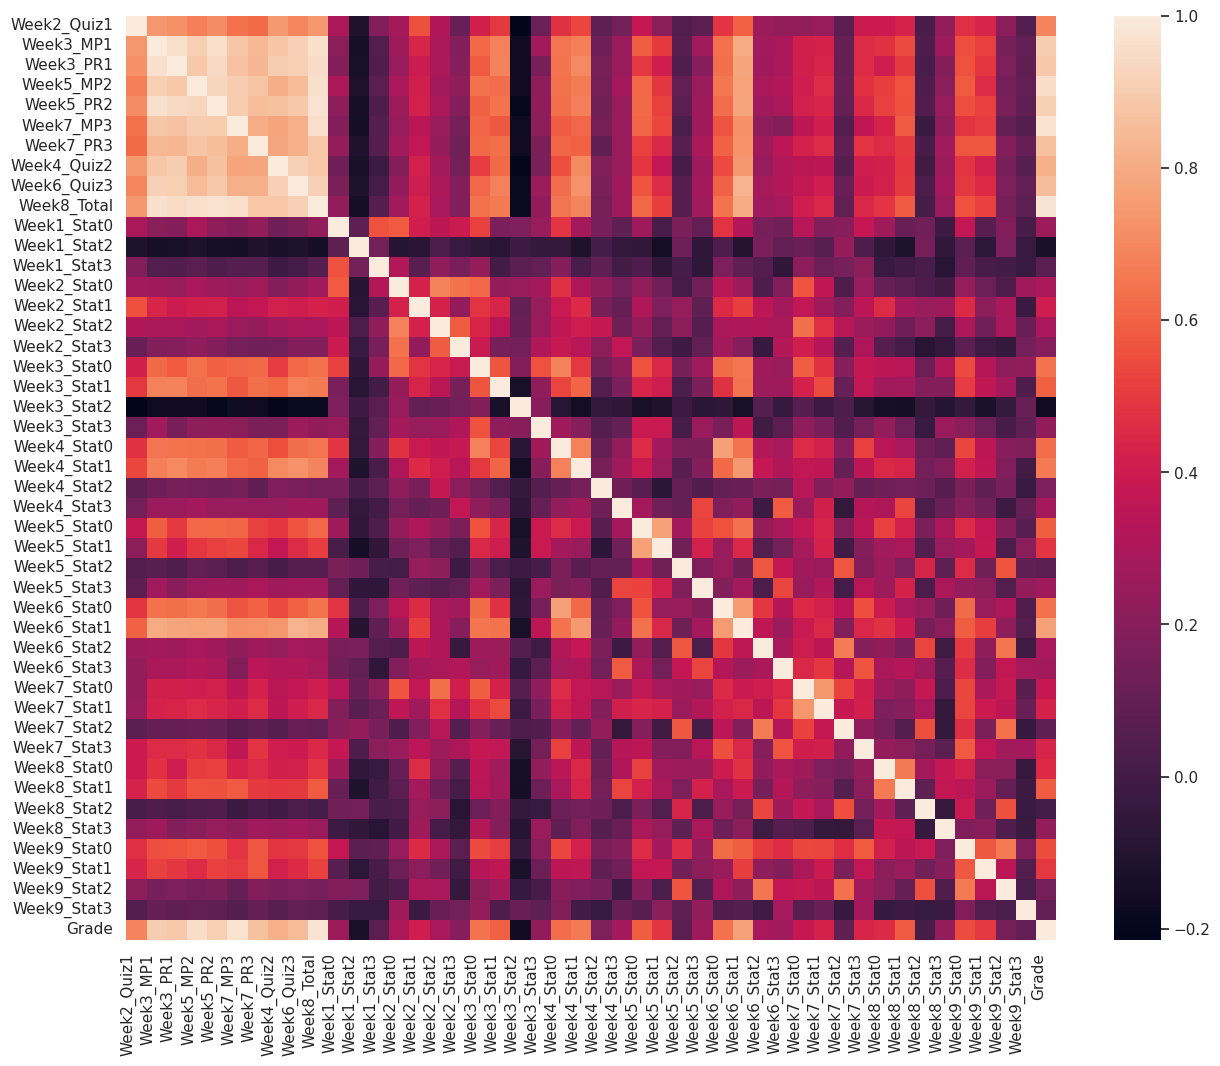

In [16]:
# Let's create a heatmap to better understand the linear relationships in the dataset
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(students_df_corr,  ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### There are too many features to have a nice visualization but the correlation matrix here sort of summarizes the relationships between each per of features. Looking at the heatmap, we can actually see that some features such as Week3_MP1,	Week3_PR1,	Week5_MP2,	Week5_PR2,	Week7_MP3,	Week7_PR3,	Week4_Quiz2, and 	Week6_Quiz3	are highly correlated to the target variable, Grade. Also observe that Week8_Total has almost a perfect correlation(0.97)with the target variable? We should avoid the temptation to include this feature as it might lead to bias in the model as mentioned before. Note however that the problem is not it being highly correlated to the target variable, but becuase it is a summary of the students performance. By looking at Week8_Total alone, we can easily tell the grade each student will get. As such, there won't be any need for an ML model to predict the students' final grades. With this, we can select which features to include in training the models. Let's set it rolling ...

##### It is not hard to see that 'Week2_Quiz1',	'Week4_Quiz2', 'Week6_Quiz3', 'Week3_MP1', 'Week5_MP2',	and 'Week7_MP3' are the features that probably has the most influence on the target feature. From the point of logic, this makes absolute sense since students get more marks from doing the mini projects and quizes. Students who fail to do them will probably not receive good grades. Other features, like the *Stat* features may the model complex becuase students who show high level of activities on Moodle do not necessary get good grades. What I mean is, a students activities on Moodle might not have any impact on the final grade he gets. For this reason, we should eliminate these features to avoid the model learning unnecessarily complex patterns. Knowing this, it is easy to choose which features to train our model on

In [22]:
selected_features = ['Week2_Quiz1',	'Week4_Quiz2', 'Week6_Quiz3', 'Week3_MP1', 'Week5_MP2',	'Week7_MP3', 'Grade']
# create a dataframe only considering the selected features
students_data = students_df.loc[:, selected_features]
students_data.head()

,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3,Week3_MP1,Week5_MP2,Week7_MP3,Grade
0,5.00,5.00,5.0,15.0,16.09,21.88,4
1,3.33,4.00,5.0,15.0,17.83,22.27,4
2,1.67,5.00,5.0,13.0,15.22,27.05,3
3,2.50,3.13,5.0,14.0,10.00,31.02,3
4,0.00,4.67,5.0,15.0,12.17,15.91,2


In [23]:
# Now, let's check the correlation between the selected features
students_data.corr()

,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3,Week3_MP1,Week5_MP2,Week7_MP3,Grade
Week2_Quiz1,1.000000,0.746331,0.695119,0.739992,0.677371,0.635804,0.689783
Week4_Quiz2,0.746331,1.000000,0.912396,0.879998,0.808479,0.781677,0.810920
Week6_Quiz3,0.695119,0.912396,1.000000,0.912700,0.847296,0.814492,0.849920
Week3_MP1,0.739992,0.879998,0.912700,1.000000,0.905769,0.881352,0.901788
Week5_MP2,0.677371,0.808479,0.847296,0.905769,1.000000,0.904458,0.953488
Week7_MP3,0.635804,0.781677,0.814492,0.881352,0.904458,1.000000,0.968130
Grade,0.689783,0.810920,0.849920,0.901788,0.953488,0.968130,1.000000


#### Observing the correlation matrix above, it can be seen that there is a high correlation between Week3_MP1 and Week5_MP2, Week3_MP1 and Week7_MP3, and the pair Week5_MP2 and Week7_MP3. Even though these pair of features are highly correlated, they are totaly independent variables and should definitely be considered in training the model. The reason why they are highly correlated is that students who turn to perform well in one of the three mini projects also perform well in the other two and vice versa. Now that we have selected which features to include in training the models, let's go ahead to check the distribution of the target variable, students' final grades

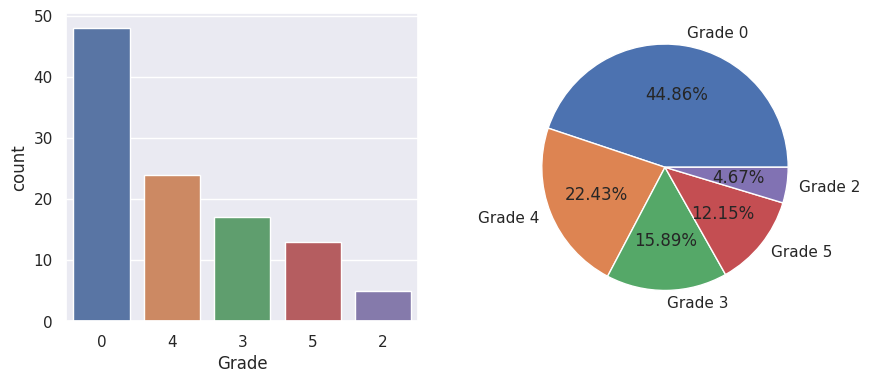

In [19]:
fig1, ax = plt.subplots(1,2, figsize=(10,4))
# count plot
sns.countplot(x='Grade', data=students_data, order=students_df['Grade'].value_counts().index, ax=ax[0])
# pie chart
ax[1]=plt.pie(students_data['Grade'].value_counts(),
            autopct='%1.2f%%', labels=['Grade 0', 'Grade 4', 'Grade 3', 'Grade 5', 'Grade 2'])
plt.show()

#### Wait, Whaaaat? Bogdan needs to explain this! Hahahah, never mind, just one of my weird jokes :) Why did so many students (almost half of the students - 44.86%) fail the course (got grade 0)? Also realize that about 13 (12.15%) of them did get grade 5? Were the labs and mini projects so hard that students couldn't do them? These are students who probably did not do the lab assignments and the mini projects, but let's not just conclude yet. This is something that our model can understand better and by its predictions, we will be able to better understand why so many students failed the course

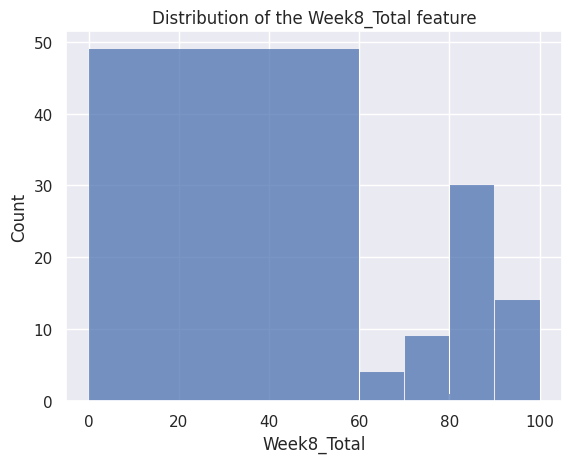

In [24]:
# For the benefit of doubt, let's visualize the 'Week8_Total' to show that it describe the grades in a way.
bins = [0,60,60.1,70, 70.1,80, 80.1,90, 90.1,100]
sns.histplot(students_df.Week8_Total, stat="count", bins=bins)
plt.title("Distribution of the Week8_Total feature")
plt.show()

### Now, compare the histogram above to the distribution of the Grades? What can you see? Isn't the histogram above the same as the distribution of the grades? By definition, students who score 60 and below receive a grade of 0, 61-70 receive grade 2, 71-80 receive grade 3, 81-90 receive grade 4 and 91-100 receive grade 5. For this reason, the model, by looking at this feature alone, it will be able to predicts the grades with a good accuracy. There is no point in using a machine learning model then since we humans could also easily tell the grade a student is likely to receive by just looking at their total scores across all quizes and assignments.

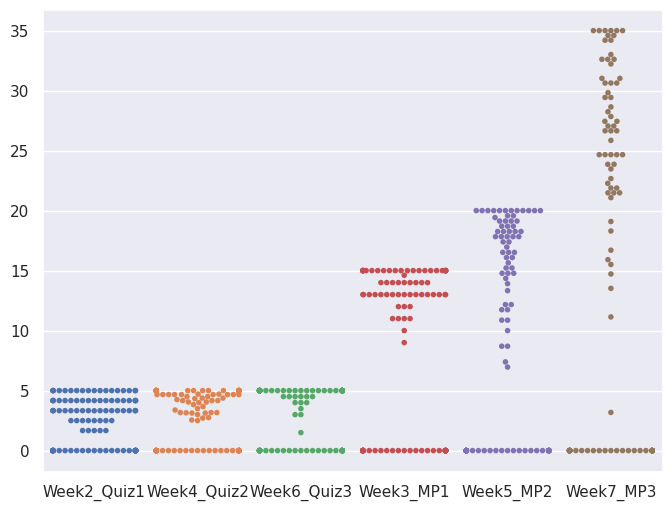

In [25]:
# Let's visualize the distribution of our selected features in one graph

plt.figure(figsize=(8,6))
sns.swarmplot(data=students_data.iloc[:, :-1], size=4)
plt.show()

#### Observe that most of the features have values equal to 0? This probably accounts for why so many students failed the course (Got grade 0). Also observe that all the three quizes carried a mark of 5 each, with most of the students performing best in quiz 1 as compared to the two other quizes. For mini project 1, it has a total mark of 15 and most of the students scored at least 10. Looking at mini project 2, the maximum possible mark was 20 and the average score was about 13. Mini project 3 had a maximum mark of 35, and about 5 students actually got a perfect mark! How impressive! Mini project 3 has high standard deviation as compared to the two other mini projects (this can be confirmed by observing that the points are spread out, they are not clustered around any particular mark.

# Machine learning

###### Before anything else, it is a good practice to standardize our data so that features that have high value entries won't be more decisive in the model's predictions. Also, we will divide our dataset into training and testing sets. Since the dataset available is very limited, we won't bother to have a validation set. Let's begin by defining helper functions for these tasks

In [26]:
# Let's first define a helper function to take care of the standardizing
def standard_scaler(X_train, X_test):
  """
  Parameters:
    X_train: training samples
    X_test: testing samples
  """
  # create a standard scaler object
  scaler = StandardScaler()
  # fit the training data to the standard scaler
  scaler.fit(X_train)
  # transform the training samples
  X_train_scaled = scaler.transform(X_train)
  # transform the testing samples
  X_test_scaled = scaler.transform(X_test)
  # return the scaled x_train and x_test datasets
  return X_train_scaled, X_test_scaled

###############################################################  training the model #########################################################################################
# Let's create  a helper function to build and evaluate models
def train_model(model, x_train, x_test, y_train):
  """
  Arguments:
    model: model to train
    x_train: training samples. Must be a dataframe or a numpy array object
    x_test: training samples. Must be a dataframe or a numpy array object
    y_train: training target values
    y_test: testing target values
  Returns:  predictions made for x_test
  """
  # Fit the model
  model.fit(x_train, y_train)
  # make predictions
  y_pred = model.predict(x_test)
  # get the model's score on the training set
  score_ = model.score(x_train, y_train)
  return y_pred, score_


In [27]:
# Let's separate the input features from the target variable
X_inputs = students_data.iloc[:, :-1]
targets = students_data.iloc[:, -1]
# check the unique target values (classes)
targets.unique()

array([4, 3, 2, 0, 5])

In [ ]:
# check the first few rows of the input features
X_inputs.head()

,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3,Week3_MP1,Week5_MP2,Week7_MP3
0,5.00,5.00,5.0,15.0,16.09,21.88
1,3.33,4.00,5.0,15.0,17.83,22.27
2,1.67,5.00,5.0,13.0,15.22,27.05
3,2.50,3.13,5.0,14.0,10.00,31.02
4,0.00,4.67,5.0,15.0,12.17,15.91


##### Now, Let's split the dataset into train and test sets
### Step 3 - Train Test Split

In [28]:
# the train_test_split function shuffles our dataset by default before splitting so we don't have to worry about first shuffling the dataset
x_train, x_test, y_train, y_test = train_test_split(X_inputs, targets, test_size=0.2, stratify=targets, random_state=42)

In [29]:
# Let's check if the split resulted in what we wanted
print(f"There are {len(x_train)} training samples and {len(x_test)} testing samples")
print(f"|There are {len(y_train)} training target values and {len(y_test)} testing target values")

There are 85 training samples and 22 testing samples
|There are 85 training target values and 22 testing target values


In [30]:
# Let's scale the dataset
x_train_scaled, x_test_scaled = standard_scaler(x_train, x_test)
# check if the scaling went well.
x_train_scaled[:1]

array([[-1.2109758 , -1.1282096 , -1.10211973, -1.14954991, -1.08017918,
        -1.03573324]])

### Step 3 - Model Training
### 1. Sochastic Gradient Descent Classifier

In [31]:
# Great, the data has been scaled. Let's begining by creating and training our models
# Let's start with a Sochastic Gradient Descent Classifier
sgd_clf = SGDClassifier( random_state=3)
sgd_clf_preds, sgd_clf_score_ = train_model(sgd_clf, x_train_scaled, x_test_scaled, y_train)

In [32]:
print(f"SGD model's score on the training set is: {round(sgd_clf_score_, 2)}")
print(f"SGD model's score on the test set is: {round(accuracy_score(y_test, sgd_clf_preds), 2)}")

SGD model's score on the training set is: 0.71
SGD model's score on the test set is: 0.73


#### The performance of the SGD Classifier is not very bad. Given the size of the dataset and the fact that, we aren't performing any hyperparameter tuning, an accuracy of 73% is just fine. Let's Try random forest to see how it performs

### 2. Random Forest Classifier

In [33]:
rf_clf = RandomForestClassifier(n_estimators=5, random_state=3)
rf_clf_preds, rf_clf_score_ = train_model(rf_clf, x_train_scaled, x_test_scaled, y_train)
print(f"Random Forest's score on the training set is: {round(rf_clf_score_, 2)}")
print(f"Random Forest's score on the test set is: {round(accuracy_score(y_test, rf_clf_preds),2)}")

Random Forest's score on the training set is: 0.96
Random Forest's score on the test set is: 0.95


#### Notice the difference in the results above? The random forest classifier is performing relatively better than the SGD classifier. But why is this the case? Well, it turns out that Random forest can handle imbalanced datasets (as in our case - we have more samples representing Grade 0, while other grades have very few samples) by adjusting class weights or using sampling techniques, while SGD classifier may struggle with imbalanced datasets becuase it has no built in techniques to handle imbalanced datasets.

## Step 4 - Performance Evaluation

##### Now, let's evaluate the performance of the models we've built. Two models are required for this task but I decided to train three different models to see how they perform against each other

In [34]:
# Let's print the classification summary of the three models deveoped.
def classification_summary(y_test):
  """
  Arguments:
    y_test: testing target values
  """
  ######################### stochastic gradient descent classifier report #################################
  print(f"CLASSIFICATION SUMMARY OF THE SGD CLASSIFIER")
  print(f"{classification_report(y_test, sgd_clf_preds, zero_division=True)}\n")
  ######################### Random Forest classifier report ###############################################
  print(f"CLASSIFICATION SUMMARY OF THE RANDOM FOREST CLASSIFIER")
  print(f"{classification_report(y_test, rf_clf_preds, zero_division=True)}\n")

In [35]:
classification_summary(y_test)

CLASSIFICATION SUMMARY OF THE SGD CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           2       1.00      0.00      0.00         1
           3       0.33      1.00      0.50         3
           4       1.00      0.60      0.75         5
           5       1.00      0.33      0.50         3

    accuracy                           0.73        22
   macro avg       0.87      0.57      0.54        22
weighted avg       0.91      0.73      0.74        22


CLASSIFICATION SUMMARY OF THE RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.83      1.00      0.91         5
           5       1.00      0.67      0.80         3

    accuracy                           0.95        22
   macro avg       0.97      0

#### There are few points I want to mention before moving on.
#### 1. Notice that both models are predicting instances for grade 0 with very high scores (high precision, recall, and f1-score)? Well, this is because most of the training samples belong to this class.
##### 2. The Random Forest model has the best accuracy (95%). Given the size of the data, I would say this is a very good performance.

#### Let's visualize the results in a confusion matrix

In [36]:
def conf_matrix(y_test, y_pred, title):
  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True)
  plt.xlabel("Predicted classes")
  plt.ylabel("Actual classes")
  plt.title(title)
  plt.show


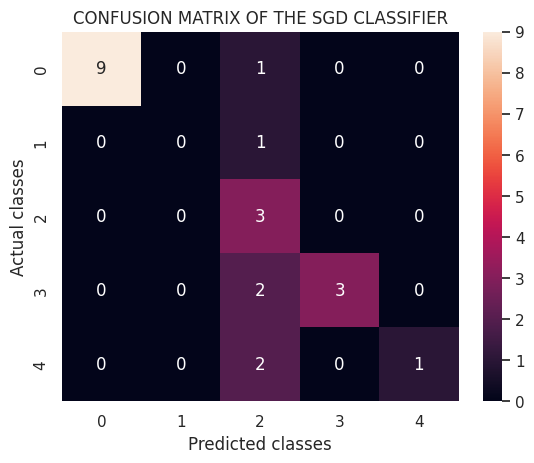

In [37]:
title = 'CONFUSION MATRIX OF THE SGD CLASSIFIER'
conf_matrix(y_test, sgd_clf_preds, title)

##### Before checking the confusion matrix for the other model, let's lament on the confusion matrix above. From the confusion matrix above, we can observe the SGD model didn't perform that well on instances belonging to class 3 and class 4. However, it did well on predicting instances that belong to class 2(grade 3) and class 0 (grade 0).

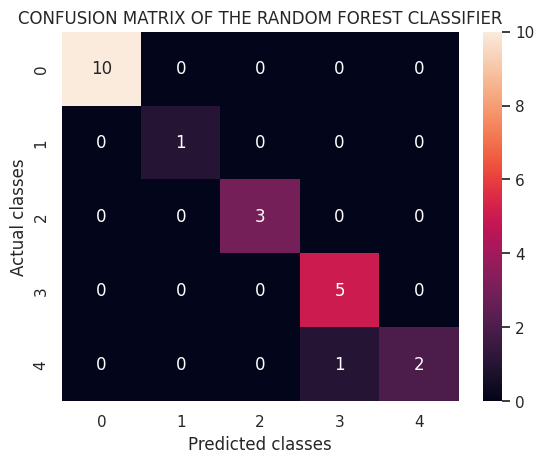

In [38]:
title = 'CONFUSION MATRIX OF THE RANDOM FOREST CLASSIFIER'
conf_matrix(y_test, rf_clf_preds, title)

#### The random forest correctly identified all instances belonging to class 0 (grade 0) as well as correctly predicting the instances that belong to class 1 (grade 2), class 2 (Grade 3) and class 3 (Grade 4). It however made some mistakes in identifying the class 4 instances.

##### I am tempted to visualize the feature the Random classifier relied on during its predictions, so let's visualize that.

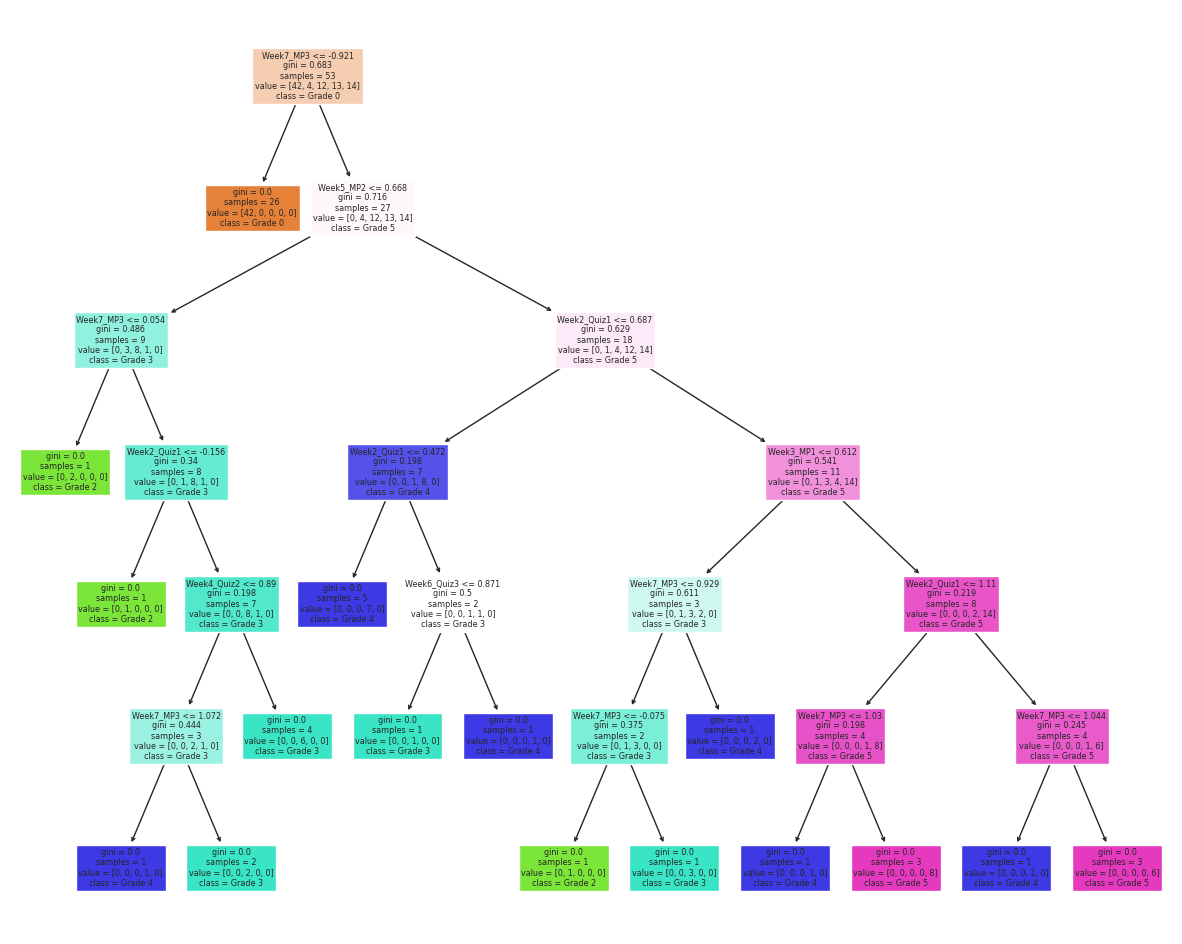

In [39]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(rf_clf.estimators_[0], feature_names = X_inputs.columns, class_names=["Grade 0","Grade 2","Grade 3","Grade 4","Grade 5"],filled = True)
plt.show()

#### From the graph above, we can actually visualize how the various estimators (trees) make their predictions (we only did the visualization for only one decision tree. There are 5 in total since n_estimators is set to 5). The random forest classifier makes its final prediction by considering the majority vote for a particular instance. It is not also difficult to see that all the trees can easily identify instances belonging to Grade 0 with ease.

### Step 5 - Feature Importance


In [40]:
# keep track of the indices of the features and their importance score
important_features_dict = {}
for idx, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)
# Sort the features based on their importance score
important_feature_names_sorted = x_train.columns[important_features_list].values

In [41]:
# Let's check the sorted list of important features
important_feature_names_sorted

array(['Week5_MP2', 'Week7_MP3', 'Week6_Quiz3', 'Week4_Quiz2',
       'Week2_Quiz1', 'Week3_MP1'], dtype=object)

In [42]:
import operator
# Sort the dictionary in descending order to get the most influential features first
sorted_d = sorted(important_features_dict.items(), key=operator.itemgetter(1))
sorted_d = dict( sorted(important_features_dict.items(), key=operator.itemgetter(1),reverse=True))
# A dict of important features and their scores, sorted
important_features_dict_sorted = dict(zip(important_feature_names_sorted, sorted_d.values()))
important_features_dict_sorted

{'Week5_MP2': 0.3502166844101747,
 'Week7_MP3': 0.2996041190625922,
 'Week6_Quiz3': 0.12241106240923523,
 'Week4_Quiz2': 0.11636543609986086,
 'Week2_Quiz1': 0.07134586123696002,
 'Week3_MP1': 0.040056836781177024}

#### From the output of the cell above, We can see that mini project 2 had more influence on our best model (random forest) than mini project 3. This is probably becuase mini project 3's scores were a bit mixup. What I mean is that perhabs those who scored very high in mini project ended up not getting a grade 5 becuase they probably didn't perform well in the other mini projects and vice versa.

### In conclusion, according to our top performing model (random forest classifier), the top three features which contributed much to our best model's predictions on students' grades are:
#### 1. Week5_MP2': (Mini project 2)
#### 2. 'Week7_MP3': (Mini porject 3)
#### 2. 'Week6_Quiz3': (Quiz 3)

#### The finding makes sense since mini project 3 and mini project 2 has much weight on the final grade